# Taux de CO2 à Mona Loa

In [1]:
from matplotlib import pyplot as plt
import isoweek
import pandas as pd
from datetime import timedelta
from datetime import date, datetime
from scipy.optimize import curve_fit
import numpy as np

# Import et vérifications des données: 
date import 9 avril 2024

In [2]:
CO2_df=pd.read_csv('https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv', skiprows=43)
CO2_df=CO2_df.rename(columns={' indicated by the date in the first column.                             ':'ppm'})
CO2_df
last_import_date=datetime(2024,4,9)

In [3]:
# il n'y a pas de données manquantes
CO2_df.isnull().any()

ppm    False
dtype: bool

In [4]:
#conversion des données de dates en format date
CO2_df.index=pd.to_datetime(CO2_df.index)

# caractérisation des évolutions :
tendance globale

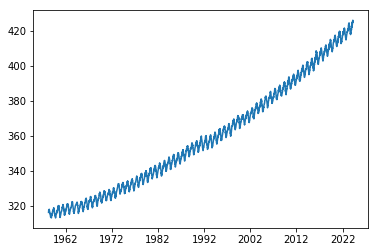

In [5]:
plt.plot(CO2_df['ppm'])

La tendance de fond semble suivre une courbe polynomiale + saisonière sinusoide

## Modelisation de la tendance de fond :
Transformation des dates en jours depuis l'origine de la mesure pour modeliser la fonction :
> CO2_df.index-CO2_df.index[0]).days

In [6]:
#définition d'une courbe pour la tendance de fond:
def func(x,a,b,c): 
    x=(x-CO2_df.index[0]).days
    return a*x*x+b*x+c#+5*np.sin(d*np.sqrt(x))

popt, pcov = curve_fit(func, CO2_df.index, CO2_df['ppm'])

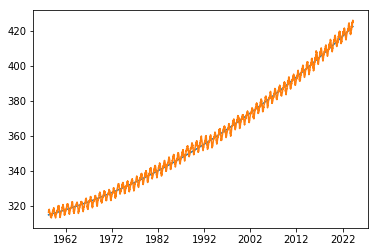

In [7]:
# tendance globale
plt.plot(CO2_df.index, func(CO2_df.index, *popt))
plt.plot(CO2_df)

(400, 430)

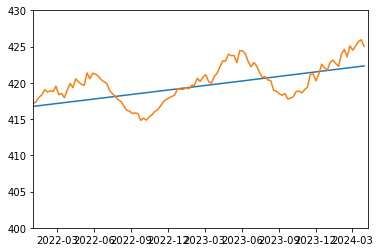

In [8]:
# zoom sur la dernière année
plt.plot(CO2_df.index, func(CO2_df.index, *popt))
plt.plot(CO2_df)
plt.xlim(date(2022,1,1),last_import_date)
plt.ylim(400,430)

## Caractérisation de la part oscillatoire :

(737425.0, 738985.0)

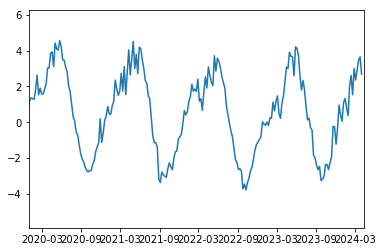

In [9]:
# soustraction de la tendance de fond (la colonne modulo)
CO2_df['polynomial']=func(CO2_df.index, *popt)
CO2_df['modulo']=CO2_df['ppm']-CO2_df['polynomial']

#affichage du résultat:
plt.plot(CO2_df['modulo'])
plt.xlim(date(2020,1,1), last_import_date)

In [10]:
#création d'une fonction sinusoïdale à calibrer sur les 3 dernières années:
def func2(x,a,b,c): 
    x=(x-CO2_df.index[0]).days
    return a*np.sin(b*x+c)

popt2, pcov2 = curve_fit(func2, CO2_df.index, CO2_df['modulo'])

(737425.0, 738985.0)

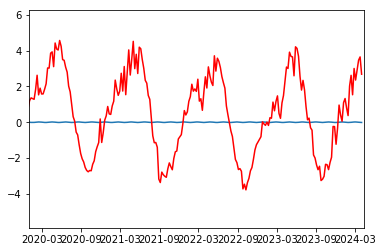

In [11]:
plt.plot(CO2_df.index, func2(CO2_df.index, *popt2))
plt.plot(CO2_df.index, CO2_df['modulo'], color='red')
plt.xlim(date(2020,1,1), last_import_date)
# ne parvient pas à fitter : ni sur tout le modèle, si sur les dernières oscillations

(736330.0, 738985.0)

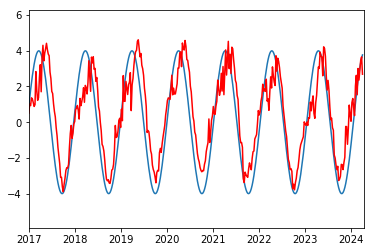

In [12]:
#optimisation manuelle par itération des paramètres de la courbe sinusoïde
a=4
b=0.017
c=-0.2

plt.plot(CO2_df.index, func2(CO2_df.index,a,b,c))
plt.plot(CO2_df.index, CO2_df['modulo'], color='red')
plt.xlim(date(2017,1,1), last_import_date)


(400, 430)

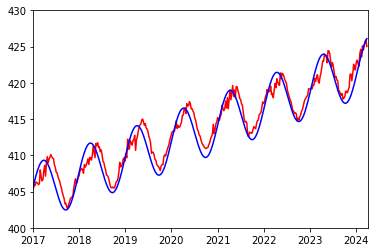

In [13]:
def func3(x,i,j,k):

    return func2(x,a,b,c)+func(x,i,j,k)


#rajout des deux composantes pour obtenir la courbe de modélisation finale qui semble bien calibrée sur les dernières années
plt.plot(CO2_df.index, CO2_df['ppm'], color='red')
plt.plot(CO2_df.index, func3(CO2_df.index, *popt), color='blue')
plt.xlim(date(2017,1,1), last_import_date)
plt.ylim(400,430)

# Modéliser 2025 

In [14]:
#créer une colonne modélisée: 
CO2_df['modelise']=func3(CO2_df.index, *popt)


In [15]:
#créer de nouvelles dates
i = last_import_date
while i < datetime(2025,12,31):
    i=i+timedelta(days=1)
   
    CO2_df.loc[i,'modelise']=func3(i, *popt)

(400, 430)

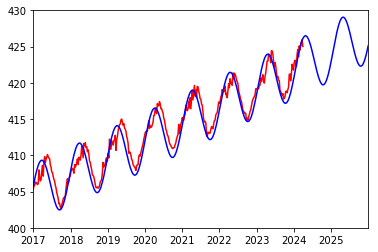

In [17]:
#rajout des deux composantes pour obtenir la courbe de modélisation finale qui semble bien calibrée sur les dernières années
plt.plot(CO2_df.index, CO2_df['ppm'], color='red')
plt.plot(CO2_df.index, func3(CO2_df.index, *popt), color='blue')
plt.xlim(date(2017,1,1), date(2025,12,31))
plt.ylim(400,430)

In [22]:
jour=int(input('what day of the month? : '))
mois=int(input('what month ? for instance, if january please input 1 : '))
annee=int(input('what year? : '))
print('the predicted CO2 ppm is : '+str(func3(datetime(day=jour, month=mois, year=annee), *popt))+' ppm')

what day of the month? : 1
what month ? for instance, if january please input 1 : 1
what year? : 2027
the predicted CO2 ppm is : 427.4526470993247 ppm
